In [54]:
import numpy as np
from pylab import mpl, plt

Plot styling


In [55]:
style = 'seaborn-v0_8'
plt.style.use(style)
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

Plotting Function


In [56]:
def create_plot(x,y, styles, labels, axlabels):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    
    plt.legend(loc = 0)

Values used for the plotting and the calculations.


In [57]:
def f(x):
    return np.sin(x) + 0.5 * x

x = np.linspace(-2 * np.pi, 2*np.pi, 50)

ndarray object for the basis function values


In [58]:
matrix = np.zeros((3 + 1, len(x)))


Regression Paramaters


In [59]:
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

matrix[0:, 0:3]

array([[   1.        ,    1.        ,    1.        ],
       [  -6.28318531,   -6.02672876,   -5.77027222],
       [  39.4784176 ,   36.3214596 ,   33.2960415 ],
       [-248.05021344, -218.89958529, -192.12722335]])

Regression Step


In [60]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]
reg

array([ 1.13340410e-14,  5.62777448e-01, -8.88178420e-16, -5.43553615e-03])

Regression Estimates

In [61]:
ry = np.dot(reg, matrix)
ry

array([-2.18774909, -2.20187043, -2.20306461, -2.19188173, -2.16887188,
       -2.13458516, -2.08957165, -2.03438145, -1.96956464, -1.89567132,
       -1.81325159, -1.72285552, -1.62503322, -1.52033478, -1.40931028,
       -1.29250982, -1.17048349, -1.04378138, -0.91295358, -0.77855019,
       -0.6411213 , -0.50121699, -0.35938737, -0.21618251, -0.07215252,
        0.07215252,  0.21618251,  0.35938737,  0.50121699,  0.6411213 ,
        0.77855019,  0.91295358,  1.04378138,  1.17048349,  1.29250982,
        1.40931028,  1.52033478,  1.62503322,  1.72285552,  1.81325159,
        1.89567132,  1.96956464,  2.03438145,  2.08957165,  2.13458516,
        2.16887188,  2.19188173,  2.20306461,  2.20187043,  2.18774909])

Plotting Results


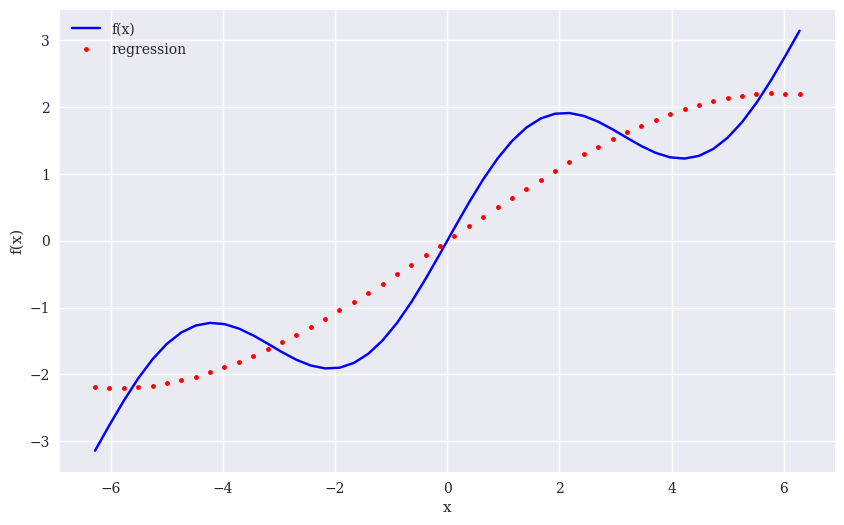

In [62]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],['f(x)', 'regression'], ['x', 'f(x)'])

Not a great result..


Include a sine function in set of basis function


In [63]:
matrix[3, :] = np.sin(x)

In [64]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond = None)[0]
reg.round(4)

array([0. , 0.5, 0. , 1. ])

Regression Estimates

In [65]:
ry = np.dot(reg, matrix)

Regression now leads to a perfect fit

In [66]:
np.allclose(f(x), ry)

True

In [67]:
np.mean((f(x) - ry) ** 2)

3.6269112712700424e-32

Plot the result

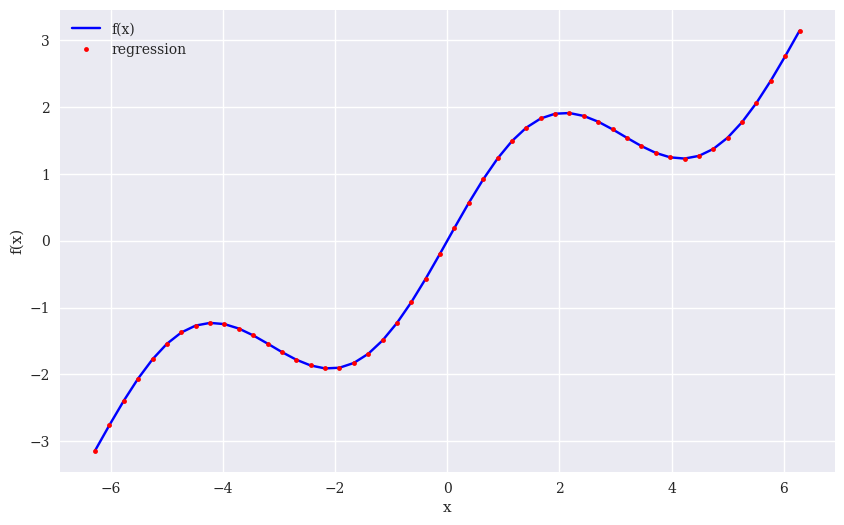

In [68]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],['f(x)', 'regression'], ['x', 'f(x)'])